In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-prediction/weather_prediction_dataset.csv
/kaggle/input/weather-prediction/metadata.txt
/kaggle/input/weather-prediction/weather_prediction_bbq_labels.csv


In [2]:
import pandas as pd

# Load datasets
weather_data_path = '/kaggle/input/weather-prediction/weather_prediction_dataset.csv'
labels_data_path = '/kaggle/input/weather-prediction/weather_prediction_bbq_labels.csv'
metadata_path = '/kaggle/input/weather-prediction/metadata.txt'

# Load weather prediction dataset
weather_df = pd.read_csv(weather_data_path)

# Load BBQ labels dataset
labels_df = pd.read_csv(labels_data_path)

# Load metadata
with open(metadata_path, 'r') as file:
    metadata_content = file.read()

# Display basic information and sample data
print("Weather Prediction Dataset:")
print(weather_df.info())
print(weather_df.head())

print("\nBBQ Labels Dataset:")
print(labels_df.info())
print(labels_df.head())

print("\nMetadata:")
print(metadata_content)

Weather Prediction Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB
None
       DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51 

In [3]:
print(labels_df.shape)
print(weather_df.shape)

(3654, 18)
(3654, 165)


In [4]:
labels_df.head()

,DATE,BASEL_BBQ_weather,BUDAPEST_BBQ_weather,DE_BBQ_weather,DRESDEN_BBQ_weather,DUSSELDORF_BBQ_weather,HEATHROW_BBQ_weather,KASSEL_BBQ_weather,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20000102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20000103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20000104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,20000105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# Data understanding
weather_df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_max,DE_BILT_cloud_cover,DE_BILT_wind_speed,DE_BILT_wind_gust,DE_BILT_humidity,DE_BILT_pressure,DE_BILT_global_radiation,DE_BILT_precipitation,DE_BILT_sunshine,DE_BILT_temp_mean,DE_BILT_temp_min,DE_BILT_temp_max,DRESDEN_cloud_cover,DRESDEN_wind_speed,DRESDEN_wind_gust,DRESDEN_humidity,DRESDEN_global_radiation,DRESDEN_precipitation,DRESDEN_sunshine,DRESDEN_temp_mean,DRESDEN_temp_min,DRESDEN_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_wind_gust,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,...,OSLO_cloud_cover,OSLO_wind_speed,OSLO_wind_gust,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,PERPIGNAN_wind_speed,PERPIGNAN_humidity,PERPIGNAN_pressure,PERPIGNAN_global_radiation,PERPIGNAN_precipitation,PERPIGNAN_temp_mean,PERPIGNAN_temp_min,PERPIGNAN_temp_max,ROMA_cloud_cover,ROMA_humidity,ROMA_pressure,ROMA_global_radiation,ROMA_sunshine,ROMA_temp_mean,ROMA_temp_min,ROMA_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,3,0.92,1.0268,0.52,0.0,3.7,-4.9,-0.7,7,2.5,8.0,0.97,1.0240,0.11,0.10,0.0,6.1,3.5,8.1,8,3.2,7.2,0.89,0.09,0.32,0.0,1.0,-1.8,2.0,8,2.5,5.9,0.92,1.0240,0.12,0.22,0.0,4.2,2.5,...,7,0.9,5.1,0.94,1.0130,0.04,0.60,0.0,-5.0,-8.6,-3.2,4.4,0.71,1.0267,0.60,0.00,12.2,10.3,14.0,0,0.72,1.0244,0.92,8.4,1.6,3.0,8.0,7,0.89,0.82,1.34,0.0,-15.2,-17.0,-13.4,8,1.0163,0.17,0.0,-2.3,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,8,0.94,1.0297,0.14,0.0,0.4,-3.6,-1.9,8,3.7,9.0,0.97,1.0267,0.11,0.00,0.0,7.3,5.4,8.7,7,4.0,8.8,0.89,0.23,0.00,0.4,2.5,1.4,4.0,6,3.0,7.4,0.87,1.0283,0.19,0.00,0.7,6.5,2.7,...,6,1.9,5.7,0.94,1.0076,0.11,0.00,1.6,-0.8,-6.7,2.4,2.9,0.67,1.0278,0.96,0.00,9.8,5.1,14.6,2,0.74,1.0263,0.81,6.5,4.2,0.0,8.4,5,0.86,0.60,0.39,2.8,-13.7,-15.0,-12.3,8,1.0108,0.20,0.0,1.3,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,6,0.95,1.0295,0.19,0.0,0.0,-0.8,1.1,8,6.1,13.0,0.94,1.0203,0.11,0.45,0.0,8.4,6.4,9.6,7,5.4,12.1,0.79,0.18,0.00,0.0,4.2,1.3,5.1,7,5.5,14.3,0.78,1.0235,0.12,0.28,0.0,7.7,6.9,...,6,1.7,8.7,0.88,1.0016,0.04,0.00,0.0,1.2,-1.1,3.8,2.5,0.85,1.0288,0.93,0.00,8.6,4.1,13.2,0,0.77,1.0288,0.89,0.0,3.8,11.1,21.1,3,0.41,0.81,0.00,5.1,-9.2,-12.5,-5.8,7,1.0071,0.08,1.8,0.8,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,8,0.94,1.0252,0.21,0.0,0.0,-1.0,0.1,7,3.8,15.0,0.94,1.0142,0.11,1.09,0.0,6.4,4.3,9.4,8,6.0,14.4,0.88,0.11,0.22,0.0,4.4,3.4,5.2,7,6.0,16.8,0.87,1.0162,0.12,0.97,0.0,7.8,6.6,...,1,3.4,11.8,0.58,0.9982,0.13,0.00,5.3,2.1,-0.5,5.1,1.5,0.85,1.0269,0.56,0.02,8.6,4.3,12.8,1,0.85,1.0273,0.89,8.2,6.0,2.0,10.0,1,0.25,1.05,0.11,8.7,-5.6,-7.0,-4.2,2,0.9947,0.00,5.0,3.5,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,5,0.88,1.0235,0.43,0.0,0.8,0.2,3.9,3,4.0,12.0,0.90,1.0183,0.48,0.00,6.5,4.4,1.4,7.4,2,5.6,15.8,0.76,0.49,0.00,5.7,1.8,-0.5,6.9,4,4.5,11.2,0.80,1.0203,0.51,0.00,6.5,5.2,0.4,...,8,1.2,5.7,0.94,1.0055,0.05,0.06,0.0,-0.7,-4.0,0.5,2.6,0.74,1.0219,0.83,

In [6]:
weather_df.shape

(3654, 165)

In [7]:
list(weather_df.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('f

In [8]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


In [9]:
weather_df.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_max,DE_BILT_cloud_cover,DE_BILT_wind_speed,DE_BILT_wind_gust,DE_BILT_humidity,DE_BILT_pressure,DE_BILT_global_radiation,DE_BILT_precipitation,DE_BILT_sunshine,DE_BILT_temp_mean,DE_BILT_temp_min,DE_BILT_temp_max,DRESDEN_cloud_cover,DRESDEN_wind_speed,DRESDEN_wind_gust,DRESDEN_humidity,DRESDEN_global_radiation,DRESDEN_precipitation,DRESDEN_sunshine,DRESDEN_temp_mean,DRESDEN_temp_min,DRESDEN_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_wind_gust,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,...,OSLO_cloud_cover,OSLO_wind_speed,OSLO_wind_gust,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,PERPIGNAN_wind_speed,PERPIGNAN_humidity,PERPIGNAN_pressure,PERPIGNAN_global_radiation,PERPIGNAN_precipitation,PERPIGNAN_temp_mean,PERPIGNAN_temp_min,PERPIGNAN_temp_max,ROMA_cloud_cover,ROMA_humidity,ROMA_pressure,ROMA_global_radiation,ROMA_sunshine,ROMA_temp_mean,ROMA_temp_min,ROMA_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.00000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2.004568e+07,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,15.536782,4.890531,0.656505,1.016935,1.465487,0.136442,5.753229,12.174849,16.629091,5.303229,3.395293,9.986316,0.817882,1.015299,1.190903,0.236888,4.744444,10.70353,6.397099,14.798604,5.405036,4.256924,10.924576,0.759023,1.263432,0.175881,4.815736,9.800629,5.924056,13.671346,5.141762,3.963738,10.591680,0.755744,1.016000,1.147362,0.218043,4.324111,11.142009,6.865736,...,5.608101,2.663656,9.094800,0.723298,1.011396,1.047244,0.239792,4.848714,7.198194,3.845484,11.033443,4.669376,0.651522,1.016451,1.711773,0.150733,16.035468,11.615900,20.455337,3.520799,0.735025,1.015247,1.568177,7.162397,16.059579,11.170115,21.103229,5.446907,0.853952,1.693919,0.541475,4.891078,-4.626327,-6.884319,-2.352244,5.245758,1.011074,0.149039,5.101478,8.049808,5.104215,11.470635,3.677258,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551

In [10]:
list(weather_df.columns)

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_max',
 'DE_BILT_cloud_cover',
 'DE_BILT_wind_speed',
 'DE_BILT_wind_gust',
 'DE_BILT_humidity',
 'DE_BILT_pressure',
 'DE_BILT_global_radiation',
 'DE_BILT_precipitation',
 'DE_BILT_sunshine',
 'DE_BILT_temp_mean',
 'DE_BILT_temp_min',
 'DE_BILT_temp_max',
 'DRESDEN_cloud_cover',
 'DRESDEN_wind_speed',
 'DRESDEN_wind_gust',
 'DRESDEN_humidity',
 'DRESDEN_global_radiation',
 'DRESDEN_precipitation',
 'DRESDEN_sunshine',
 'DRESDEN_temp_mean',
 'DRESDEN_temp_min',
 'DRESDEN_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_wind_gust',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pres

In [11]:
weather_df.corr()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_max,DE_BILT_cloud_cover,DE_BILT_wind_speed,DE_BILT_wind_gust,DE_BILT_humidity,DE_BILT_pressure,DE_BILT_global_radiation,DE_BILT_precipitation,DE_BILT_sunshine,DE_BILT_temp_mean,DE_BILT_temp_min,DE_BILT_temp_max,DRESDEN_cloud_cover,DRESDEN_wind_speed,DRESDEN_wind_gust,DRESDEN_humidity,DRESDEN_global_radiation,DRESDEN_precipitation,DRESDEN_sunshine,DRESDEN_temp_mean,DRESDEN_temp_min,DRESDEN_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_wind_gust,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,...,OSLO_cloud_cover,OSLO_wind_speed,OSLO_wind_gust,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,PERPIGNAN_wind_speed,PERPIGNAN_humidity,PERPIGNAN_pressure,PERPIGNAN_global_radiation,PERPIGNAN_precipitation,PERPIGNAN_temp_mean,PERPIGNAN_temp_min,PERPIGNAN_temp_max,ROMA_cloud_cover,ROMA_humidity,ROMA_pressure,ROMA_global_radiation,ROMA_sunshine,ROMA_temp_mean,ROMA_temp_min,ROMA_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
DATE,1.000000,0.011356,0.001174,-0.008147,-0.015375,0.016141,-0.003842,-0.009677,-0.012728,-0.009987,-0.014734,0.065144,-0.204282,-0.015994,0.012750,0.015698,0.041929,0.024552,0.035024,-0.059501,-0.025768,-0.065685,-0.078756,0.004655,0.035793,-0.018139,0.043588,0.010843,0.010978,0.007512,-0.001998,-0.047522,-0.039375,-0.005482,0.031633,0.015163,0.026687,0.004874,0.003978,0.002263,-0.030347,-0.024967,-0.010966,0.036851,0.015622,0.001059,-0.003010,0.000840,-0.008586,-0.035402,...,-0.014538,-0.057516,-0.031099,0.003929,-0.010955,0.041595,0.000572,0.032465,0.007643,-0.000086,0.023027,-0.000921,-0.015390,-0.024402,0.011959,-0.006570,0.009382,-0.001120,0.018516,0.005593,-0.284726,-0.047671,-0.015418,0.038037,0.007957,-0.020188,-0.005096,0.004152,0.067444,-0.027741,-0.036306,-0.004224,0.003322,0.006158,0.001126,0.005570,-0.004199,0.001978,0.008909,0.006542,-0.001882,0.015862,-0.095234,-0.065583,-0.015614,0.032134,-0.047768,-0.008046,-0.022204,0.002878
MONTH,0.011356,1.000000,0.017050,0.259206,-0.017782,-0.096602,0.031725,-0.044536,0.155741,0.205790,0.115398,0.009919,0.154970,0.053720,-0.108688,0.016000,-0.044613,0.157578,0.135771,0.000799,-0.144791,-0.129480,0.221727,-0.027307,-0.123360,0.039245,-0.081387,0.187835,0.218595,0.152924,-0.005053,-0.078826,-0.094195,0.116417,-0.106400,0.027224,-0.028124,0.177689,0.221845,0.148756,-0.001792,-0.063911,-0.093448,0.194517,-0.017821,-0.096501,0.010908,-0.044767,0.178575,0.217561,...,0.029381,-0.020439,-0.020004,0.135692,0.009032,-0.103134,0.069578,-0.034953,0.197469,0.240410,0.148269,-0.080702,0.026337,-0.055768,-0.098645,-0.011820,0.219746,0.227664,0.200257,-0.055478,0.054653,-0.015953,-0.093828,0.004909,0.273867,0.282789,0.230459,-0.007046,-0.010394,-0.206289,-0.009000,-0.013066,0.265276,0.271627,0.251903,0.039486,0.012860,0.078068,-0.117021,0.240886,0.289718,0.188533,-0.101285,0.083276,-0.043616,-0.090087,0.018873,0.181286,0.207462,0.150901
BASEL_cloud_cover,0.001174,0.017050,1.000000,0.490337,-0.282791,-0.578605,0.288311,-0.823039,-0.187265,-0.024862,-0.299632,0.270971,0.248374,-0.322806,-0.213436,0.134788,-0.262237,-0.119639,-0.128361,0.304609,0.148599,0.186770,0.26

<Axes: >

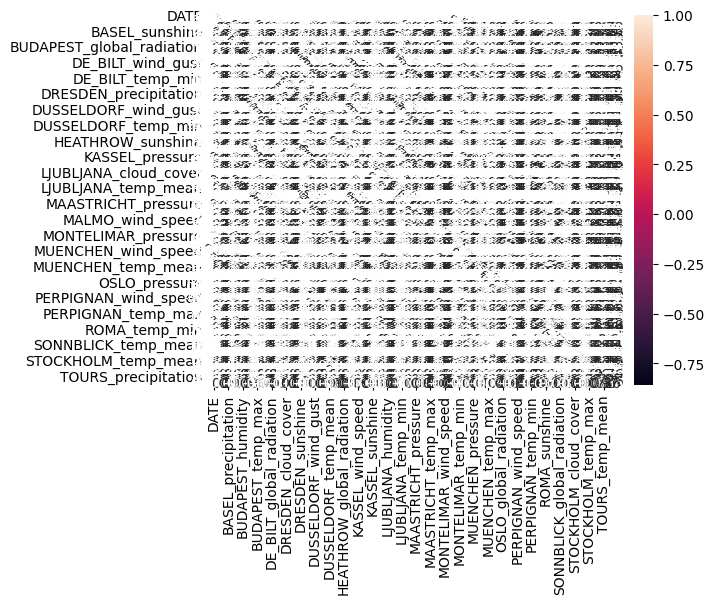

In [12]:
import seaborn as sns
sns.heatmap(weather_df.corr(),annot=True)

In [13]:
Roma=['DATE','ROMA_cloud_cover',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_global_radiation',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'ROMA_temp_min',
 'ROMA_temp_max']
weather_roma=weather_df[Roma]

In [14]:
weather_roma.head()

,DATE,ROMA_cloud_cover,ROMA_humidity,ROMA_pressure,ROMA_global_radiation,ROMA_sunshine,ROMA_temp_mean,ROMA_temp_min,ROMA_temp_max
0,20000101,0,0.72,1.0244,0.92,8.4,1.6,3.0,8.0
1,20000102,2,0.74,1.0263,0.81,6.5,4.2,0.0,8.4
2,20000103,0,0.77,1.0288,0.89,0.0,3.8,11.1,21.1
3,20000104,1,0.85,1.0273,0.89,8.2,6.0,2.0,10.0
4,20000105,2,0.92,1.0238,0.74,7.5,5.0,-1.2,11.2


In [15]:
weather_roma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATE                   3654 non-null   int64  
 1   ROMA_cloud_cover       3654 non-null   int64  
 2   ROMA_humidity          3654 non-null   float64
 3   ROMA_pressure          3654 non-null   float64
 4   ROMA_global_radiation  3654 non-null   float64
 5   ROMA_sunshine          3654 non-null   float64
 6   ROMA_temp_mean         3654 non-null   float64
 7   ROMA_temp_min          3654 non-null   float64
 8   ROMA_temp_max          3654 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 257.0 KB


In [16]:
# Converting to pandas date column
weather_roma.loc[:, 'DATE'] = pd.to_datetime(weather_roma['DATE'],infer_datetime_format=True)

/tmp/ipykernel_18/3973176787.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_roma.loc[:, 'DATE'] = pd.to_datetime(weather_roma['DATE'],infer_datetime_format=True)
/tmp/ipykernel_18/3973176787.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['1970-01-01 00:00:00.020000101', '1970-01-01 00:00:00.020000102',
 '1970-01-01 00:00:00.020000103', '1970-01-01 00:00:00.020000104',
 '1970-01-01 00:00:00.020000105', '1970-01-01 00:00:00.020000106',
 '1970-01-01 00:00:00.020000107', '1970-01-01 00:00:00.020000108',
 '1970-01-01 00:00:00.020000109', '1970-01-01 00:00:00.020000110',
 ...
 '1970-01-01 00:00:00.020091223', '1970-01-01 00:00:00.020091224',
 '1970-01-01 00:00:00.02009122

In [17]:
weather_roma.set_index('DATE',inplace=True)

In [18]:
#Basic information
# Display the first few rows of the DataFrame
print(weather_roma.head())

# Display the summary statistics
print(weather_roma.describe())

                               ROMA_cloud_cover  ROMA_humidity  ROMA_pressure  \
DATE                                                                            
1970-01-01 00:00:00.020000101                 0           0.72         1.0244   
1970-01-01 00:00:00.020000102                 2           0.74         1.0263   
1970-01-01 00:00:00.020000103                 0           0.77         1.0288   
1970-01-01 00:00:00.020000104                 1           0.85         1.0273   
1970-01-01 00:00:00.020000105                 2           0.92         1.0238   

                               ROMA_global_radiation  ROMA_sunshine  \
DATE                                                                  
1970-01-01 00:00:00.020000101                   0.92            8.4   
1970-01-01 00:00:00.020000102                   0.81            6.5   
1970-01-01 00:00:00.020000103                   0.89            0.0   
1970-01-01 00:00:00.020000104                   0.89            8.2   
1970-0

In [19]:
# Check the data types of each column
print(weather_roma.dtypes)

ROMA_cloud_cover           int64
ROMA_humidity            float64
ROMA_pressure            float64
ROMA_global_radiation    float64
ROMA_sunshine            float64
ROMA_temp_mean           float64
ROMA_temp_min            float64
ROMA_temp_max            float64
dtype: object


In [20]:
weather_roma.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 1970-01-01 00:00:00.020000101 to 1970-01-01 00:00:00.020100101
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ROMA_cloud_cover       3654 non-null   int64  
 1   ROMA_humidity          3654 non-null   float64
 2   ROMA_pressure          3654 non-null   float64
 3   ROMA_global_radiation  3654 non-null   float64
 4   ROMA_sunshine          3654 non-null   float64
 5   ROMA_temp_mean         3654 non-null   float64
 6   ROMA_temp_min          3654 non-null   float64
 7   ROMA_temp_max          3654 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 256.9 KB


In [21]:
#Checking for missing value
weather_roma.isnull().sum()

ROMA_cloud_cover         0
ROMA_humidity            0
ROMA_pressure            0
ROMA_global_radiation    0
ROMA_sunshine            0
ROMA_temp_mean           0
ROMA_temp_min            0
ROMA_temp_max            0
dtype: int64

In [22]:
# Checking for the duplicates
weather_roma.duplicated().sum()

0

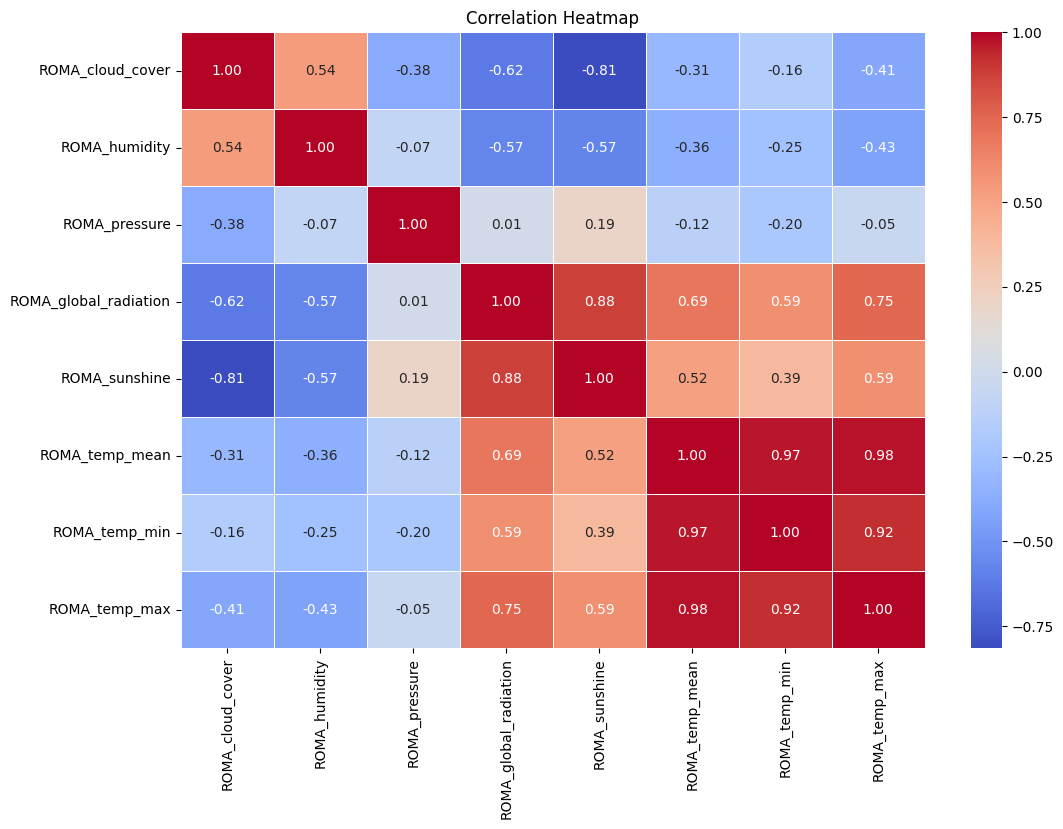

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = weather_roma.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

array([[<Axes: title={'center': 'ROMA_cloud_cover'}>,
        <Axes: title={'center': 'ROMA_humidity'}>,
        <Axes: title={'center': 'ROMA_pressure'}>],
       [<Axes: title={'center': 'ROMA_global_radiation'}>,
        <Axes: title={'center': 'ROMA_sunshine'}>,
        <Axes: title={'center': 'ROMA_temp_mean'}>],
       [<Axes: title={'center': 'ROMA_temp_min'}>,
        <Axes: title={'center': 'ROMA_temp_max'}>, <Axes: >]],
      dtype=object)

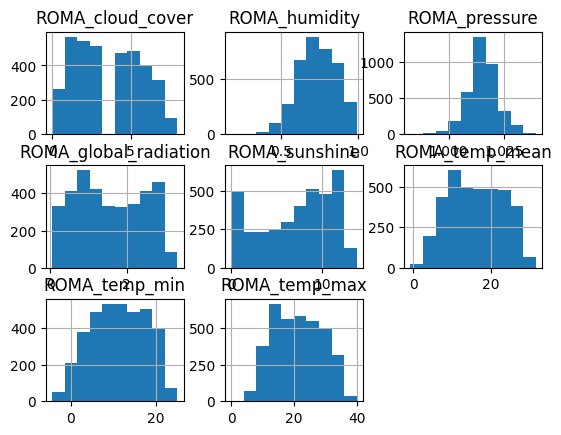

In [24]:
#Visualization
weather_roma.hist()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


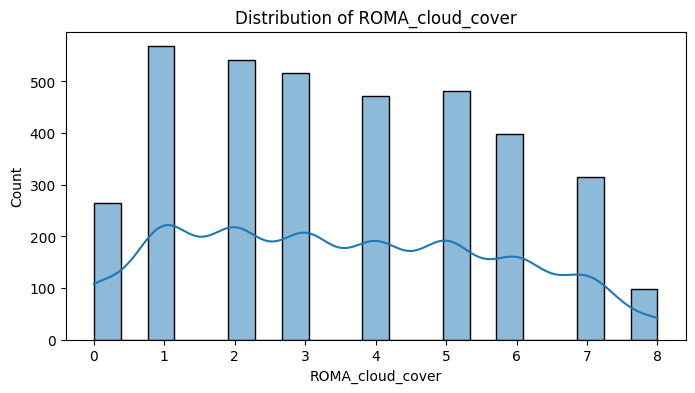

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


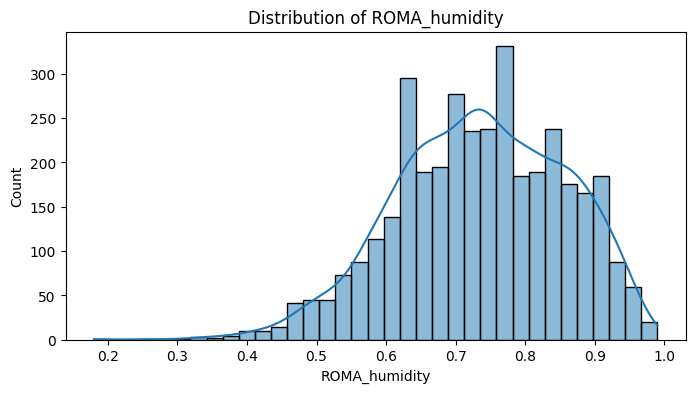

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


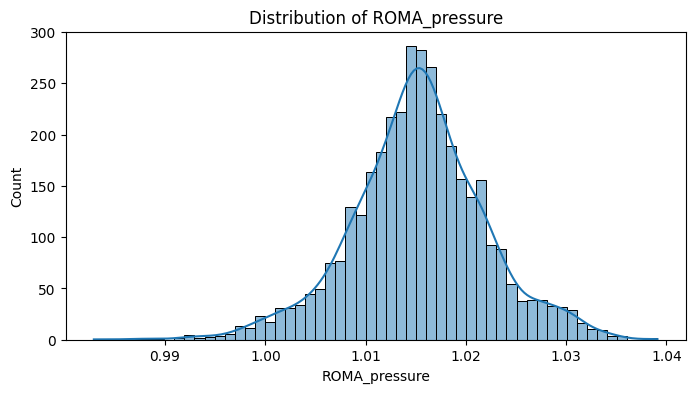

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


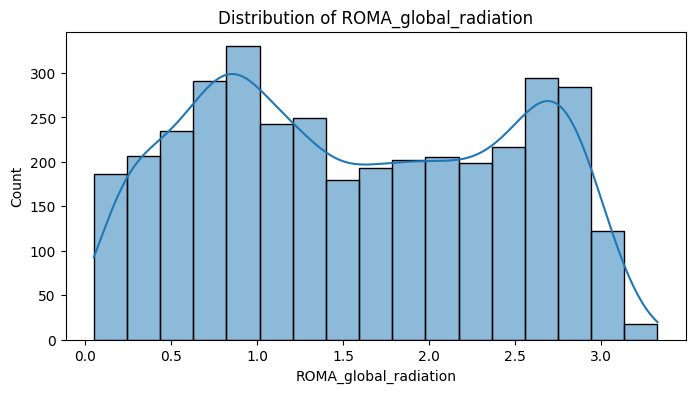

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


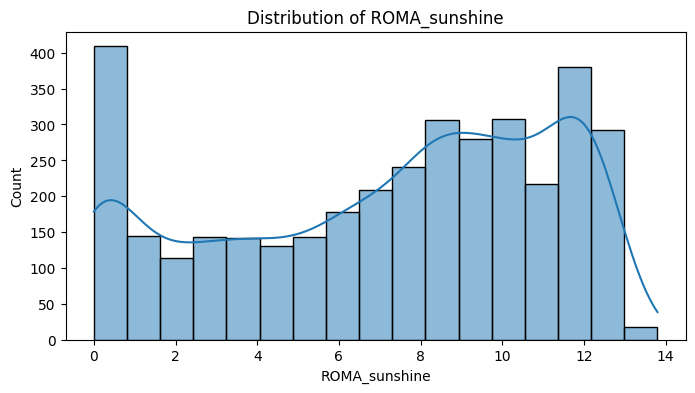

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


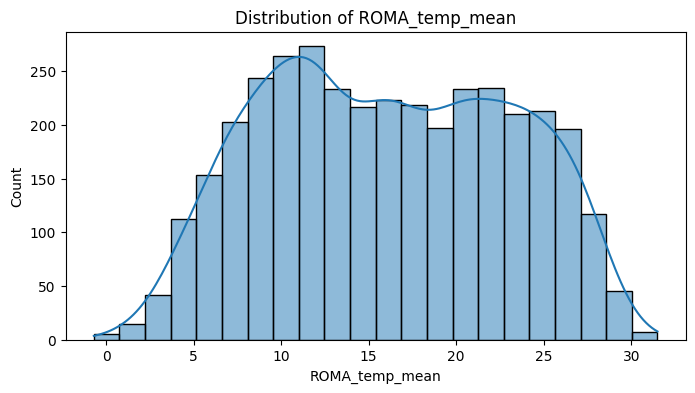

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


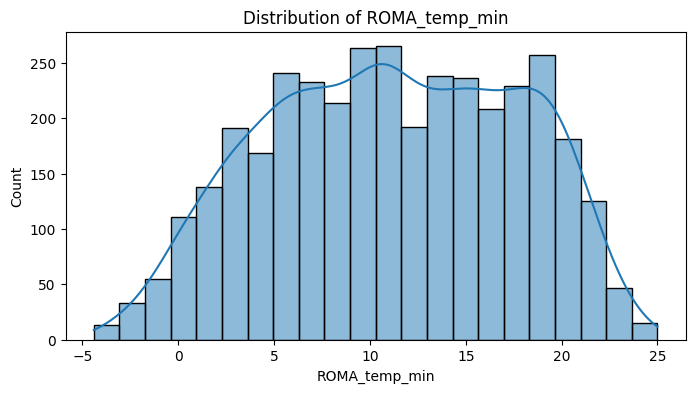

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


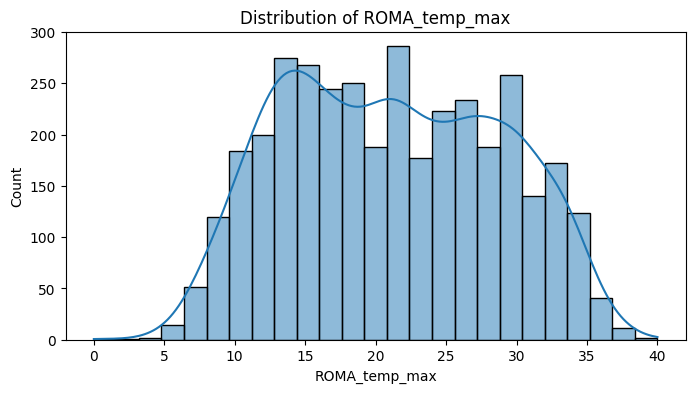

In [25]:
import matplotlib.pyplot as plt
# Plot distribution of each numerical feature
for column in weather_roma.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(weather_roma[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

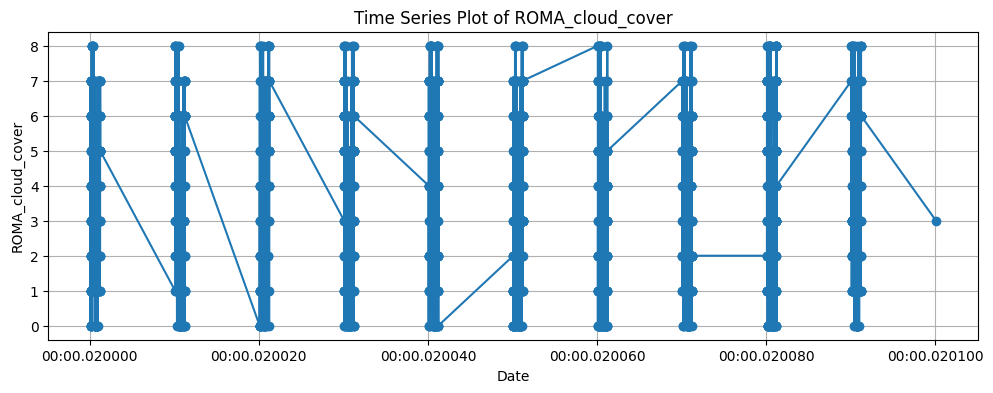

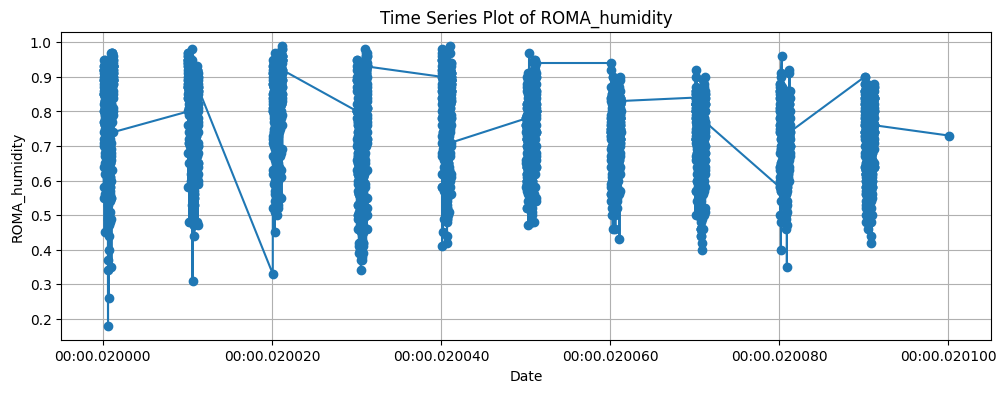

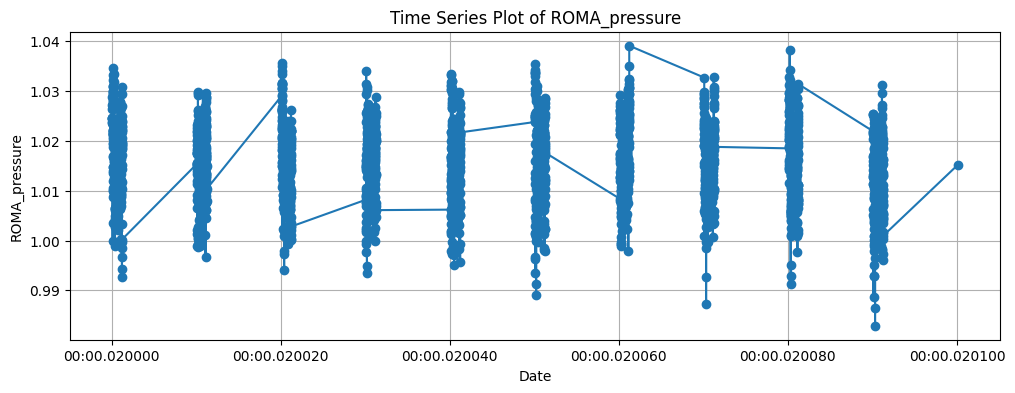

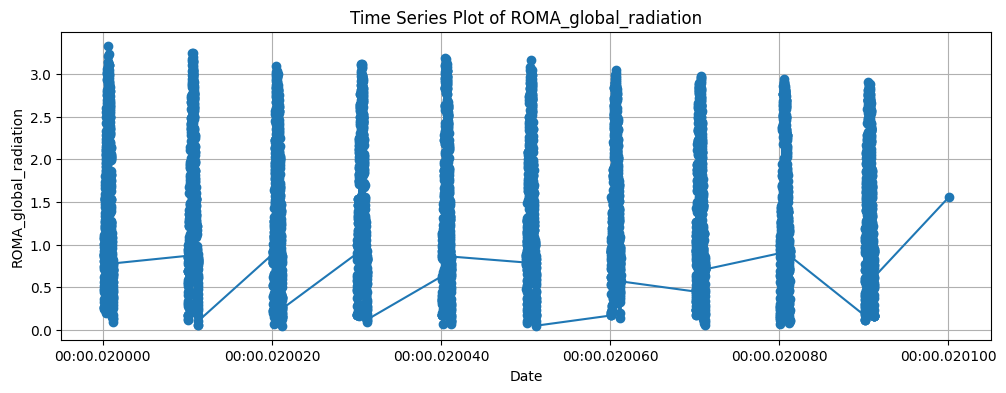

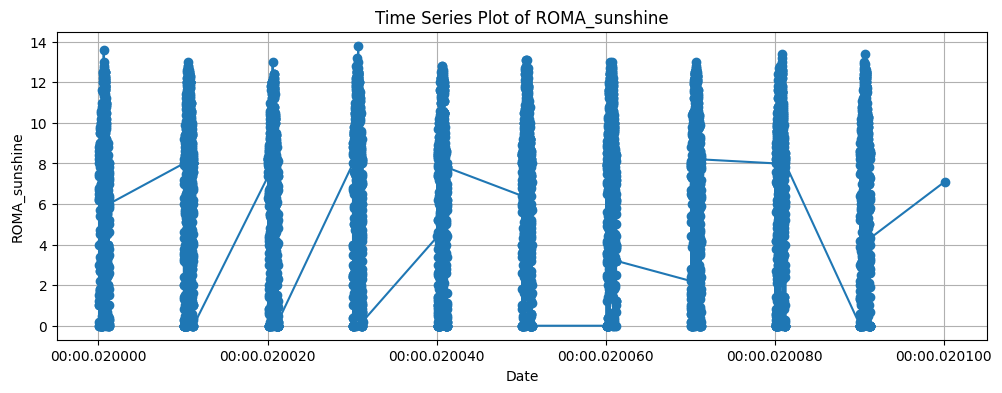

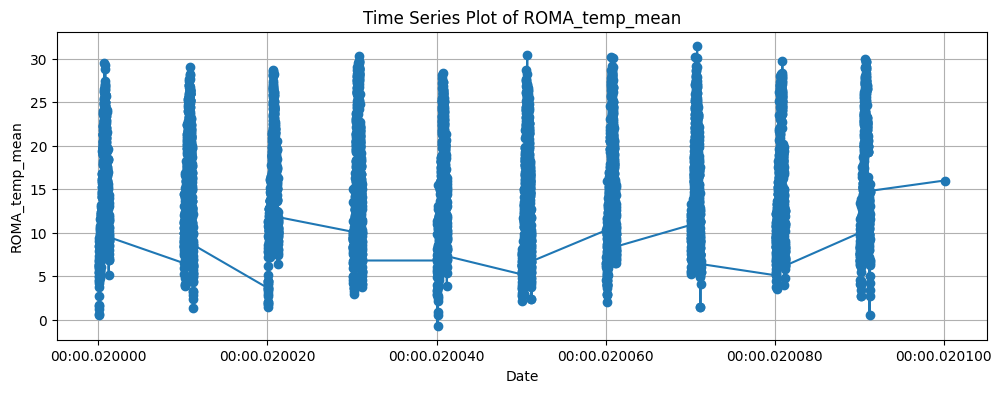

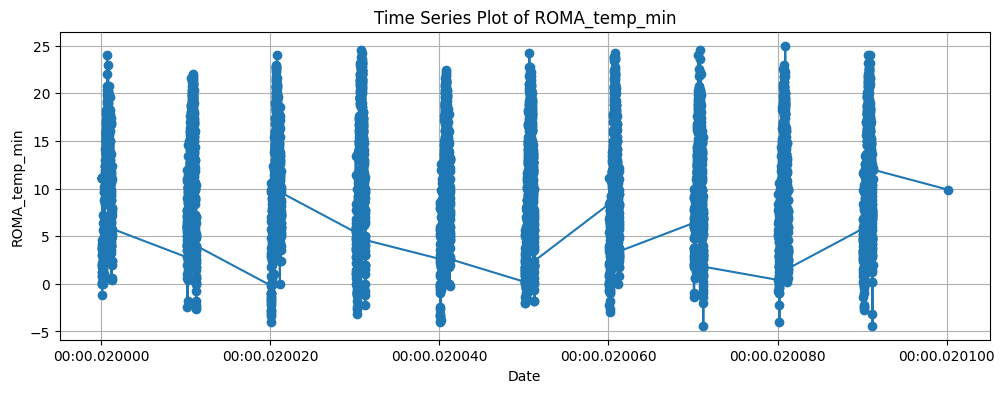

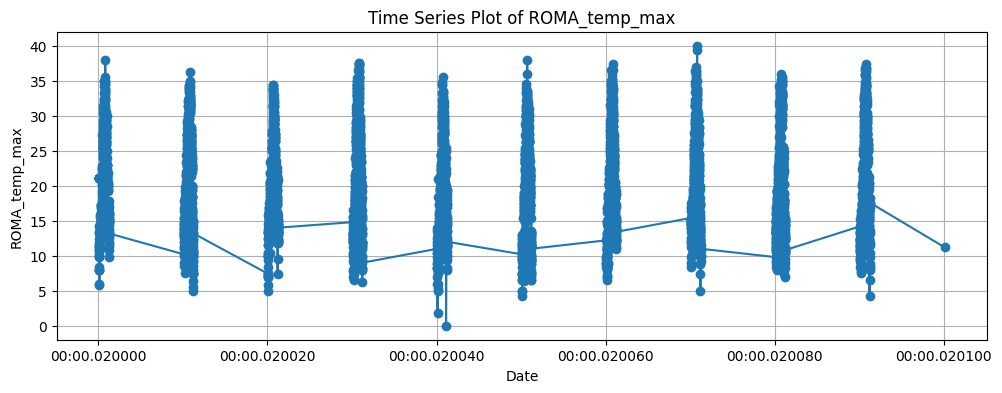

In [26]:
# Plot time series data for each feature
for column in weather_roma.columns:
    plt.figure(figsize=(12, 4))
    plt.plot(weather_roma.index, weather_roma[column], marker='o', linestyle='-')
    plt.title(f'Time Series Plot of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

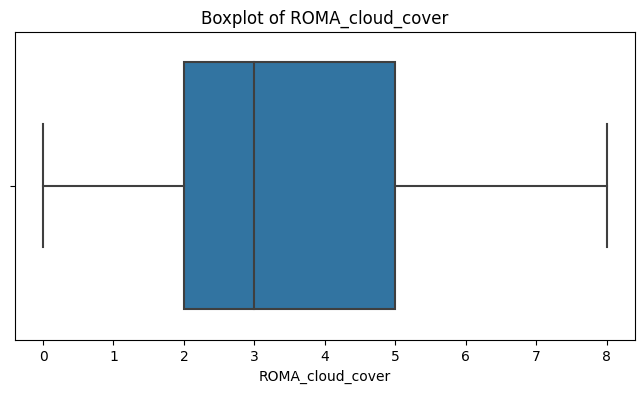

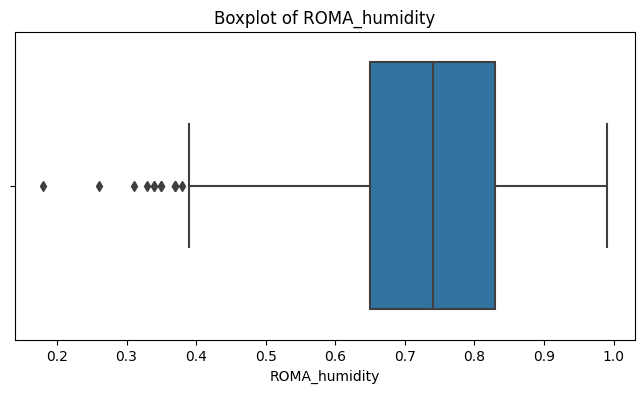

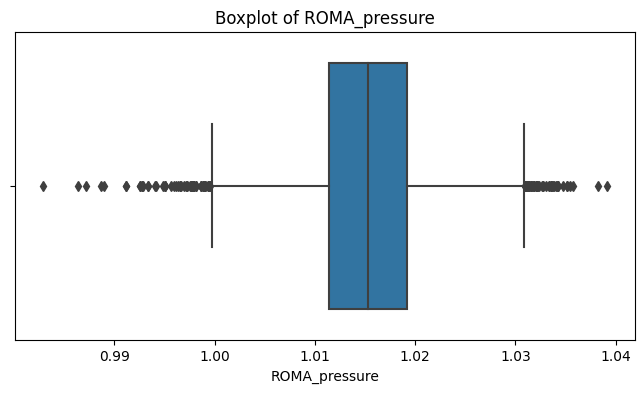

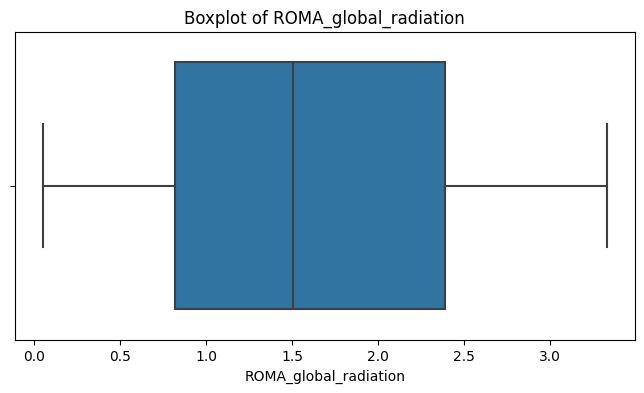

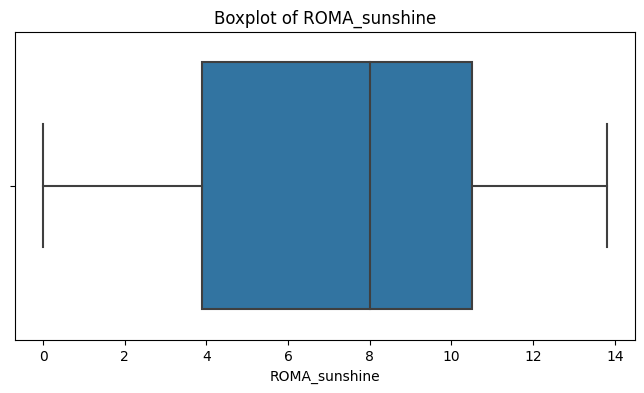

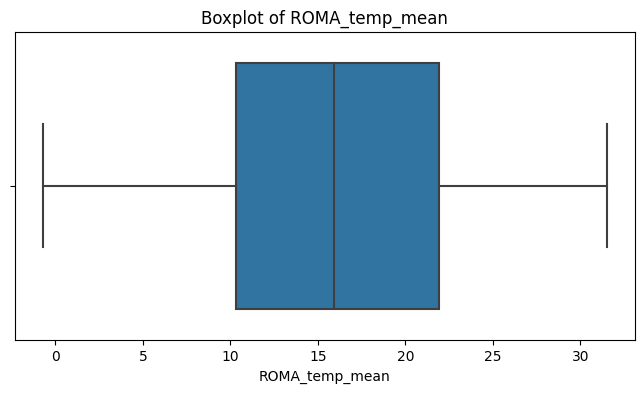

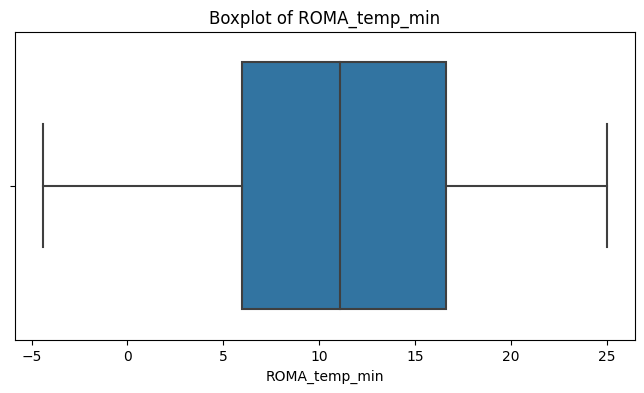

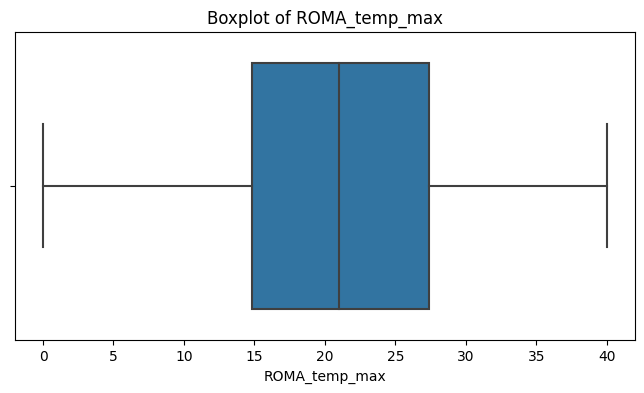

In [27]:
# Plot boxplots for each numerical feature
for column in weather_roma.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=weather_roma[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


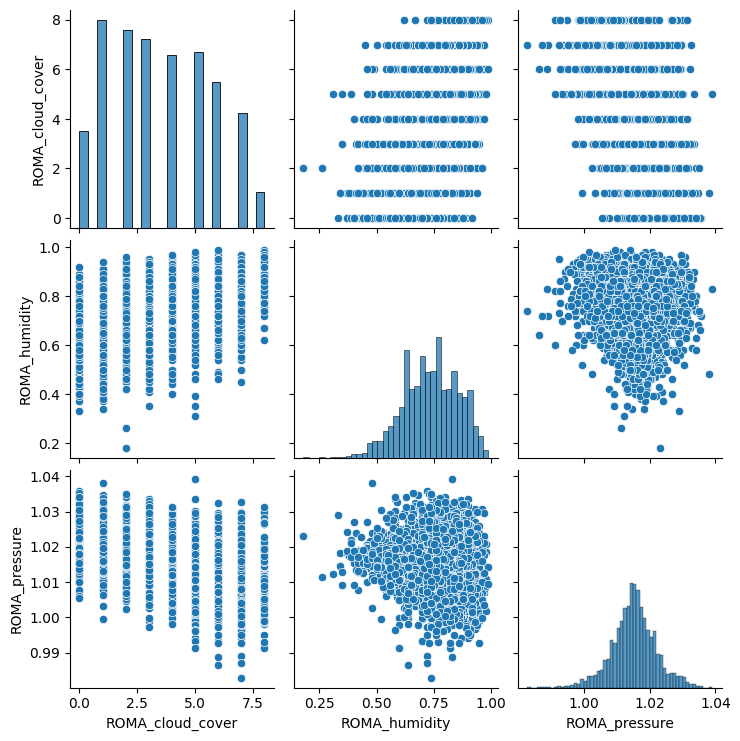

In [28]:
# Plot pairplot for selected features
sns.pairplot(weather_roma[['ROMA_cloud_cover', 'ROMA_humidity', 'ROMA_pressure']])
plt.show()

In [29]:
# 2. Outliers Detection
z_scores = np.abs((weather_roma - weather_roma.mean()) / weather_roma.std())
weather_roma = weather_roma[(z_scores < 3).all(axis=1)]

In [30]:
# 3. Feature Engineering
weather_roma['Month'] = weather_roma.index.month
weather_roma['Day'] = weather_roma.index.day

In [31]:
weather_roma.head()

,ROMA_cloud_cover,ROMA_humidity,ROMA_pressure,ROMA_global_radiation,ROMA_sunshine,ROMA_temp_mean,ROMA_temp_min,ROMA_temp_max,Month,Day
DATE,,,,,,,,,,
1970-01-01 00:00:00.020000101,0,0.72,1.0244,0.92,8.4,1.6,3.0,8.0,1,1
1970-01-01 00:00:00.020000102,2,0.74,1.0263,0.81,6.5,4.2,0.0,8.4,1,1
1970-01-01 00:00:00.020000103,0,0.77,1.0288,0.89,0.0,3.8,11.1,21.1,1,1
1970-01-01 00:00:00.020000104,1,0.85,1.0273,0.89,8.2,6.0,2.0,10.0,1,1
1970-01-01 00:00:00.020000105,2,0.92,1.0238,0.74,7.5,5.0,-1.2,11.2,1,1


In [32]:
weather_roma.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3623 entries, 1970-01-01 00:00:00.020000101 to 1970-01-01 00:00:00.020100101
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ROMA_cloud_cover       3623 non-null   int64  
 1   ROMA_humidity          3623 non-null   float64
 2   ROMA_pressure          3623 non-null   float64
 3   ROMA_global_radiation  3623 non-null   float64
 4   ROMA_sunshine          3623 non-null   float64
 5   ROMA_temp_mean         3623 non-null   float64
 6   ROMA_temp_min          3623 non-null   float64
 7   ROMA_temp_max          3623 non-null   float64
 8   Month                  3623 non-null   int32  
 9   Day                    3623 non-null   int32  
dtypes: float64(7), int32(2), int64(1)
memory usage: 283.0 KB


In [33]:

# 5. Rolling Statistics
rolling_mean = weather_roma['ROMA_temp_mean'].rolling(window=7).mean()
rolling_std = weather_roma['ROMA_temp_mean'].rolling(window=7).std()

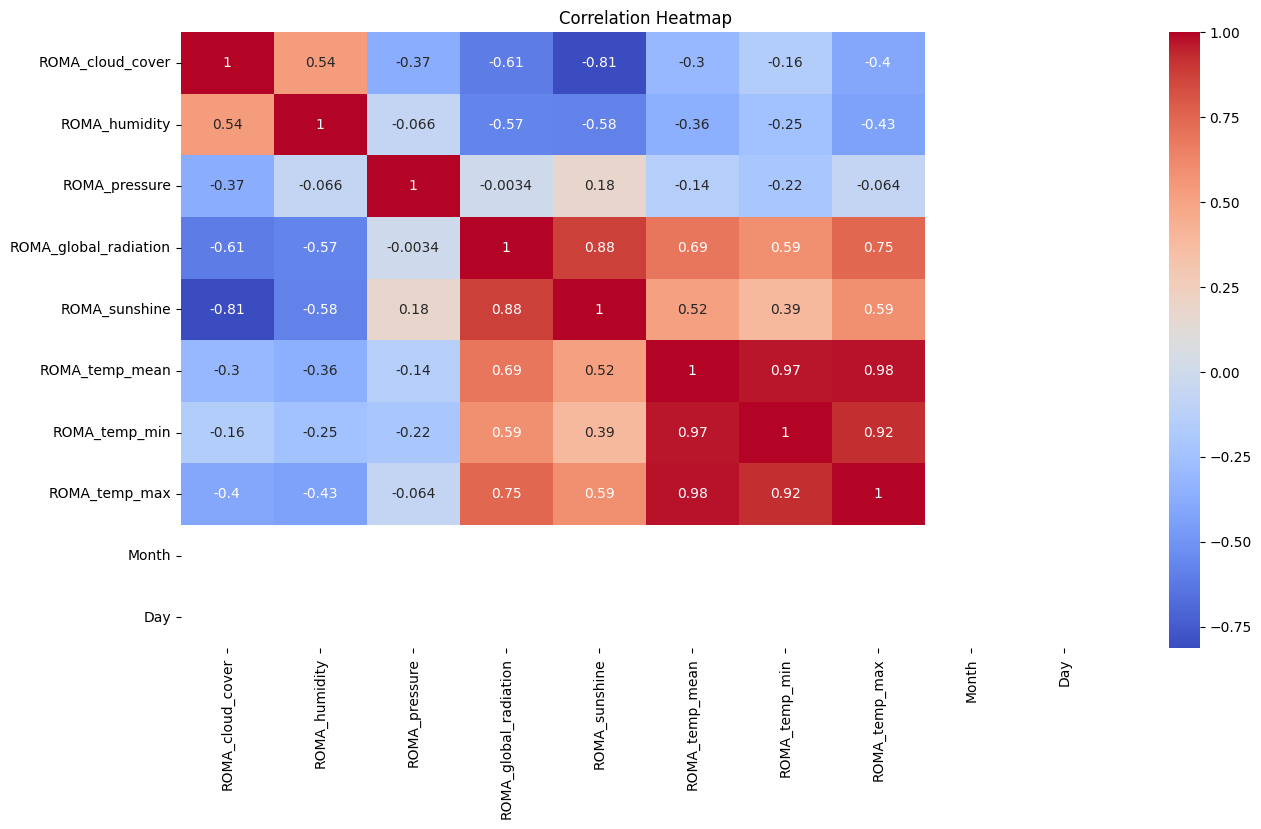

ADF Statistic: -3.6647254689212683
p-value: 0.004637586312818295


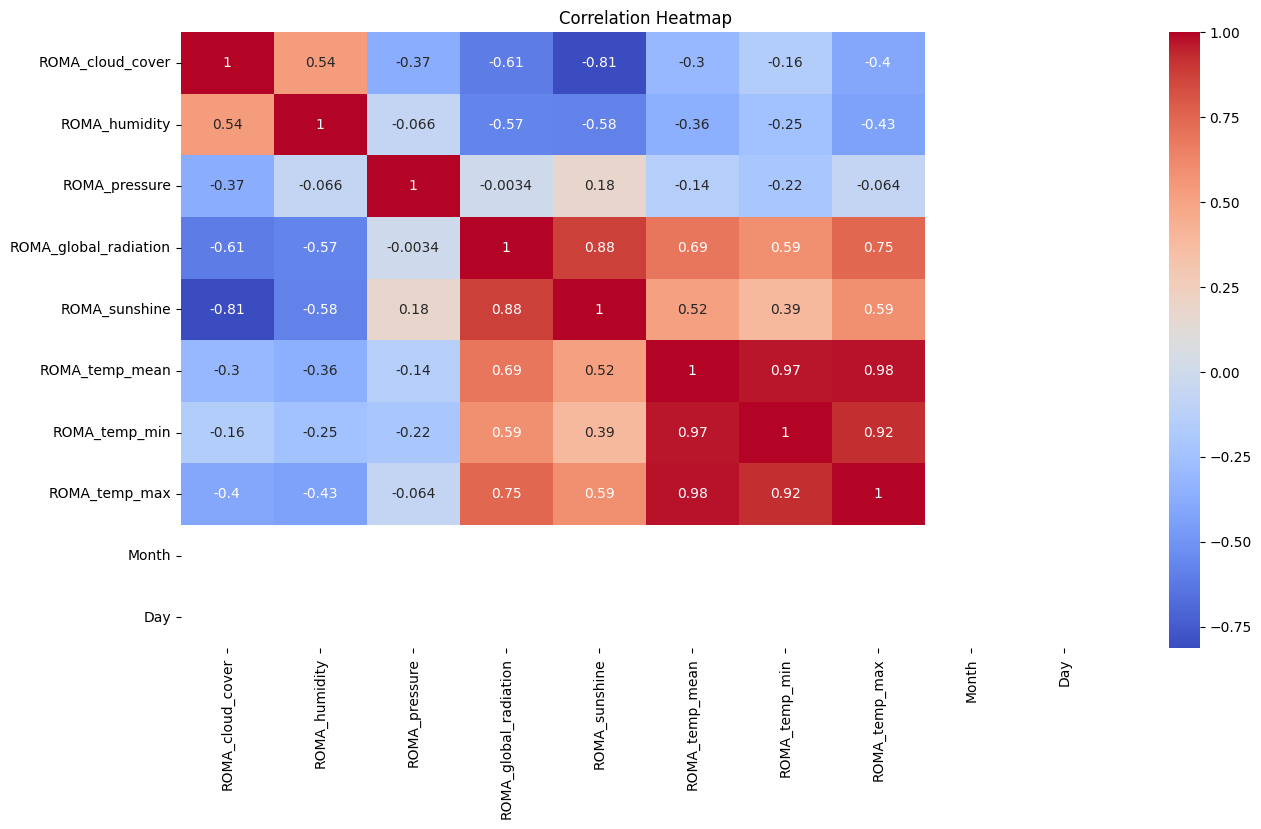

ADF Statistic: -3.6647254689212683
p-value: 0.004637586312818295


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# 7. Data Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(weather_roma.drop(['ROMA_temp_mean'], axis=1))

# 8. Feature Selection
corr_matrix = weather_roma.corr()
selected_features = corr_matrix['ROMA_temp_mean'][corr_matrix['ROMA_temp_mean'] > 0.5].index.tolist()

# 9. Advanced Visualizations
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 10. Statistical Tests
result = adfuller(weather_roma['ROMA_temp_mean'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# 11. Modeling
X = scaled_data[:, :-1]
y = scaled_data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 7. Data Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(weather_roma.drop(['ROMA_temp_mean'], axis=1))

# 8. Feature Selection
corr_matrix = weather_roma.corr()
selected_features = corr_matrix['ROMA_temp_mean'][corr_matrix['ROMA_temp_mean'] > 0.5].index.tolist()

# 9. Advanced Visualizations
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 10. Statistical Tests
result = adfuller(weather_roma['ROMA_temp_mean'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# 11. Modeling
X = scaled_data[:, :-1]
y = scaled_data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Baseline RMSE: 0.0
Root Mean Squared Error (RMSE): 0.0
Best parameters: {'max_depth': None, 'n_estimators': 50}


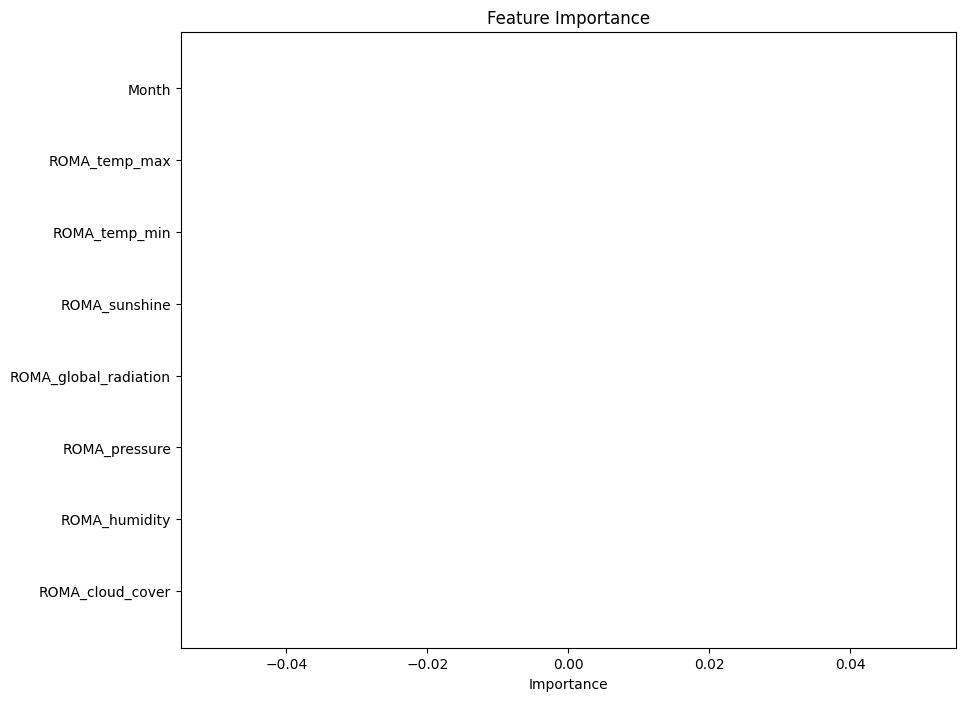

In [35]:
# 11. Modeling (continued)
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

# Grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf = grid_search.best_estimator_

# 12. Model Evaluation
# Predictions
y_pred = best_rf.predict(X_test)

# Calculate the mean of 'ROMA_temp_mean' in the training set
mean_value = y_train.mean()

# Create an array of mean values with the same length as y_test
base_pred = np.full_like(y_test, mean_value)

# Calculate RMSE for the baseline model
base_rmse = np.sqrt(mean_squared_error(y_test, base_pred))
print(f'Baseline RMSE: {base_rmse}')
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 13. Optimization and Tuning
print(f'Best parameters: {grid_search.best_params_}')

# 14. Interpretation and Reporting
# Feature Importance
feature_importance = best_rf.feature_importances_
feature_names = weather_roma.drop(['ROMA_temp_mean'], axis=1).columns
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [36]:
weather_roma.columns

Index(['ROMA_cloud_cover', 'ROMA_humidity', 'ROMA_pressure',
       'ROMA_global_radiation', 'ROMA_sunshine', 'ROMA_temp_mean',
       'ROMA_temp_min', 'ROMA_temp_max', 'Month', 'Day'],
      dtype='object')

In [37]:
weather_roma.index

DatetimeIndex(['1970-01-01 00:00:00.020000101',
               '1970-01-01 00:00:00.020000102',
               '1970-01-01 00:00:00.020000103',
               '1970-01-01 00:00:00.020000104',
               '1970-01-01 00:00:00.020000105',
               '1970-01-01 00:00:00.020000106',
               '1970-01-01 00:00:00.020000107',
               '1970-01-01 00:00:00.020000108',
               '1970-01-01 00:00:00.020000109',
               '1970-01-01 00:00:00.020000110',
               ...
               '1970-01-01 00:00:00.020091223',
               '1970-01-01 00:00:00.020091224',
               '1970-01-01 00:00:00.020091225',
               '1970-01-01 00:00:00.020091226',
               '1970-01-01 00:00:00.020091227',
               '1970-01-01 00:00:00.020091228',
               '1970-01-01 00:00:00.020091229',
               '1970-01-01 00:00:00.020091230',
               '1970-01-01 00:00:00.020091231',
               '1970-01-01 00:00:00.020100101'],
              dtype=

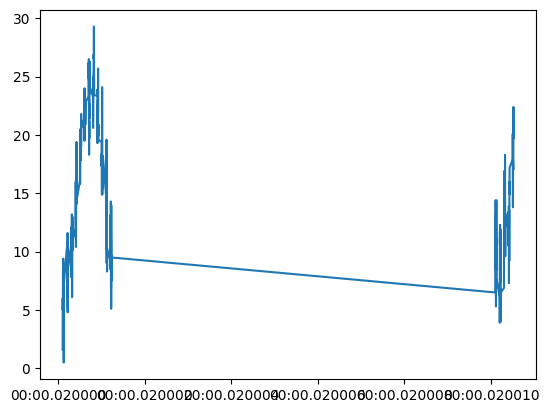

In [38]:
plt.plot(weather_roma.index[:500], weather_roma['ROMA_temp_mean'][:500])

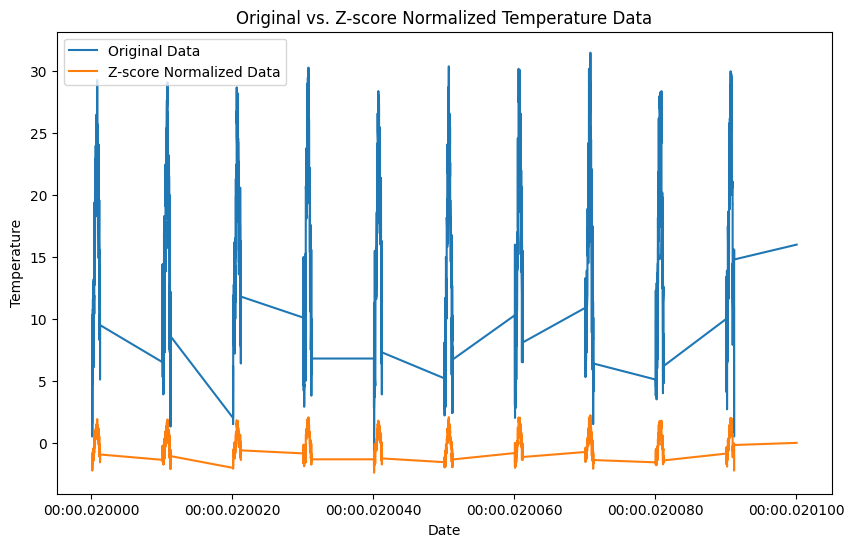

In [39]:
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
# Extract the data for plotting (e.g., first 500 data points)
index_subset = weather_roma.index
data_subset = weather_roma['ROMA_temp_mean']

# Perform Z-score normalization
zscore_data = zscore(data_subset)

# Plot the original and normalized data
plt.figure(figsize=(10, 6))
plt.plot(index_subset, data_subset, label='Original Data')
plt.plot(index_subset, zscore_data, label='Z-score Normalized Data')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Original vs. Z-score Normalized Temperature Data')
plt.legend()
plt.show()

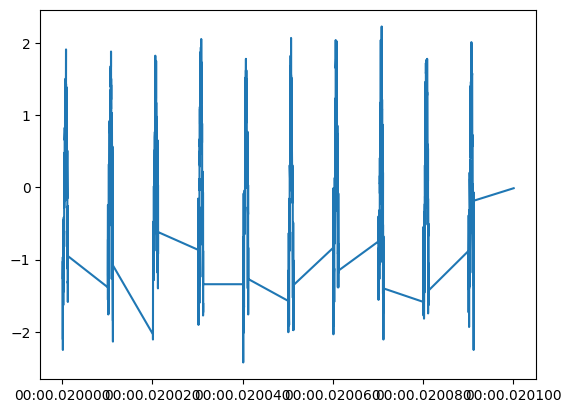

In [40]:
plt.plot(zscore_data.index, zscore_data, label='Z-score Normalized Data')

In [41]:
zscore_data=zscore_data.diff().dropna()

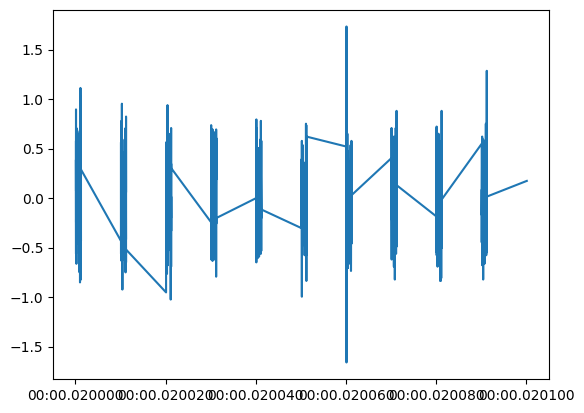

In [42]:
plt.plot(zscore_data.index, zscore_data, label='Z-score Normalized Data')

In [43]:
volatiltiy=zscore_data.groupby(zscore_data.index.year).std()

In [44]:
zscore_data_annual=zscore_data.index.map(lambda d:volatiltiy.loc[d.year])

In [45]:
zscore_data=zscore_data/zscore_data_annual

In [46]:
#print(zscore_data)

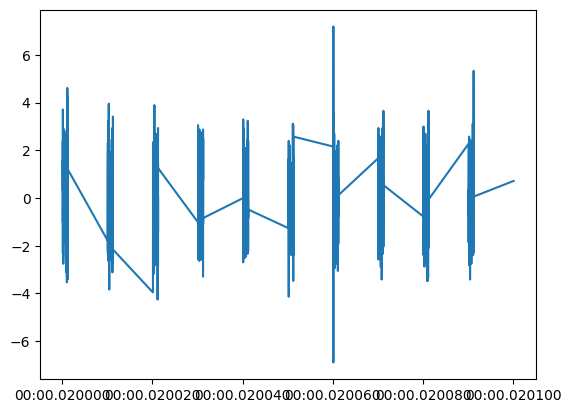

In [47]:
plt.plot(zscore_data.index, zscore_data, label='Z-score Normalized Data')

In [48]:
volatiltiyavg=zscore_data.groupby(zscore_data.index.month).mean()

In [49]:
zscore_data_monthavg=zscore_data.index.map(lambda d:volatiltiyavg.loc[d.month])

In [50]:
zscore_data=zscore_data-zscore_data_monthavg

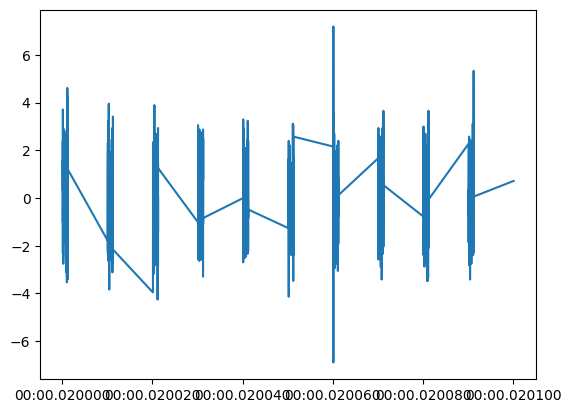

In [51]:
plt.plot(zscore_data.index, zscore_data, label='Z-score Normalized Data')

In [52]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [53]:
zscore_data.describe()

count    3.622000e+03
mean     2.206959e-18
std      1.000000e+00
min     -6.893301e+00
25%     -5.416715e-01
50%     -2.382283e-03
75%      5.369070e-01
max      7.188141e+00
dtype: float64

In [54]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(zscore_data)

#adf_result = adfuller(zscore_data)
# Extract test statistics and p-value
adf_statistic = adf_result[0]
p_value = adf_result[1]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)

# Interpret the results
if p_value <= 0.05:
    print('Reject the null hypothesis. The time series is likely stationary.')
else:
    print('Fail to reject the null hypothesis. The time series is likely non-stationary.')


ADF Statistic: -21.456240531308445
p-value: 0.0
Reject the null hypothesis. The time series is likely stationary.


<Figure size 1000x600 with 0 Axes>

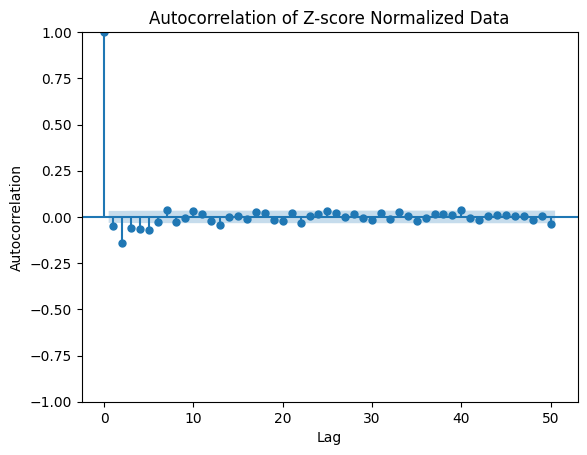

In [55]:
from statsmodels.graphics.tsaplots import plot_acf

# Compute autocorrelation for the Z-score normalized data
plt.figure(figsize=(10, 6))
plot_acf(zscore_data, lags=50)  # Adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Z-score Normalized Data')
plt.show()

In [56]:
from statsmodels.tsa.stattools import acf

# Specify the lag values for which you want to compute autocorrelation
lags = [10, 20, 30, 40]

# Compute autocorrelation for the Z-score normalized data at specified lags
autocorrelation_values = acf(zscore_data, nlags=max(lags))

# Extract autocorrelation values at specified lags
autocorrelation_at_lags = [autocorrelation_values[lag] for lag in lags]

# Print autocorrelation values at specified lags
for lag, autocorr in zip(lags, autocorrelation_at_lags):
    print(f'Autocorrelation at lag {lag}: {autocorr}')

Autocorrelation at lag 10: 0.03047612898840973
Autocorrelation at lag 20: -0.0217873370641037
Autocorrelation at lag 30: -0.017153754242403153
Autocorrelation at lag 40: 0.03538366731821962


In [57]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARMA model with lag 10 (p=10, q=0)
arma_model = ARIMA(zscore_data, order=(10, 0, 0))

# Fit the ARMA model
arma_result = arma_model.fit()

# Print the model summary
print(arma_result.summary())


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3622
Model:                ARIMA(10, 0, 0)   Log Likelihood               -5027.762
Date:                Tue, 16 Apr 2024   AIC                          10079.525
Time:                        21:30:39   BIC                          10153.862
Sample:                             0   HQIC                         10106.009
                               - 3622                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.009     -0.075      0.940      -0.017       0.016
ar.L1         -0.0980      0.013     -7.819      0.000      -0.123      -0.073
ar.L2         -0.1868      0.015    -12.294      0.0

In [58]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARMA model with lag 10 (p=10, q=0)
arma_model = ARIMA(zscore_data, order=(20, 0, 0))

# Fit the ARMA model
arma_result = arma_model.fit()

# Print the model summary
print(arma_result.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3622
Model:                ARIMA(20, 0, 0)   Log Likelihood               -5016.661
Date:                Tue, 16 Apr 2024   AIC                          10077.322
Time:                        21:30:57   BIC                          10213.607
Sample:                             0   HQIC                         10125.876
                               - 3622                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.007     -0.127      0.899      -0.015       0.013
ar.L1         -0.1015      0.013     -7.798      0.000      -0.127      -0.076
ar.L2         -0.1888      0.015    -12.328      0.0